In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.concat([pd.read_csv('cs-training.csv', index_col=0), pd.read_csv('cs-test.csv', index_col=0)], axis=0)
# df = pd.read_csv('cs-training.csv', index_col=0)
df.columns = pd.read_excel('Data Dictionary.xls').CH
df.reset_index(drop=True, inplace=True)
test_index = df[len(pd.read_csv('cs-training.csv')):].index
df

CH,逾期90天以上,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
251498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
251499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
251500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
251501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [107]:
df.isnull().sum()


CH
逾期90天以上      101503
信用卡+信貸額度          0
年齡                0
逾期30天以上次數         0
月可支配所得比例          0
月收入           49834
未清償債務數量           0
逾期90天以上次數         0
抵押貸款數量            0
逾期60天以上次數         0
眷屬數量           6550
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   逾期90天以上    150000 non-null  float64
 1   信用卡+信貸額度   251503 non-null  float64
 2   年齡         251503 non-null  int64  
 3   逾期30天以上次數  251503 non-null  int64  
 4   月可支配所得比例   251503 non-null  float64
 5   月收入        201669 non-null  float64
 6   未清償債務數量    251503 non-null  int64  
 7   逾期90天以上次數  251503 non-null  int64  
 8   抵押貸款數量     251503 non-null  int64  
 9   逾期60天以上次數  251503 non-null  int64  
 10  眷屬數量       244953 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 21.1 MB


In [109]:
df.describe()

CH,逾期90天以上,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量
count,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


In [110]:
df.dropna().corr()

CH,逾期90天以上,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量
CH,,,,,,,,,,,
逾期90天以上,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
信用卡+信貸額度,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
年齡,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
逾期30天以上次數,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
月可支配所得比例,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
月收入,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
未清償債務數量,-0.027445,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
逾期90天以上次數,0.111149,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
抵押貸款數量,-0.003005,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997


In [111]:
#  feature_clean = ['信用卡+信貸額度', '年齡', '月可支配所得比例', '月收入', '未清償債務數量']
#  Q1 = df[feature_clean].quantile(0.25)
#  Q3 = df[feature_clean].quantile(0.75)
#  IQR = Q3 - Q1

#  train = df[:len(pd.read_csv('cs-training.csv'))]

#  for i in range(len(feature_clean)):
#      train = train[train[feature_clean[i]] > (Q1[i] - 1.5 * IQR[i])]
#      train = train[train[feature_clean[i]] < (Q3[i] + 1.5 * IQR[i])]

# df = pd.concat([train, df.loc[test_index]], axis=0)

In [112]:
df.isnull().sum()

CH
逾期90天以上      101503
信用卡+信貸額度          0
年齡                0
逾期30天以上次數         0
月可支配所得比例          0
月收入           49834
未清償債務數量           0
逾期90天以上次數         0
抵押貸款數量            0
逾期60天以上次數         0
眷屬數量           6550
dtype: int64

In [113]:
df.月收入.fillna(df.月收入.median(), inplace=True)
df.眷屬數量.fillna(df.眷屬數量.mode()[0], inplace=True)

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_std = scaler.fit(df[df.columns[1:]].values)
df_std = df_std.transform(df[df.columns[1:]].values)

pca = PCA(n_components=6)
pca.fit(df_std)

PCA(n_components=6)

In [115]:
pca.explained_variance_ratio_.cumsum()

array([0.29976166, 0.45065238, 0.57421382, 0.6755156 , 0.77557915,
       0.87087259])

In [116]:
pca_components = pd.DataFrame(pca.components_)
pca_components.columns = df.columns[1:]
pca_components

CH,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量
0,-0.000477,-0.060208,0.572212,-0.013192,-0.009168,-0.078125,0.574178,-0.054090,0.574385,-0.007847
1,-0.006181,0.140924,0.068232,0.213774,0.158363,0.648009,0.050352,0.665553,0.057302,0.189666
2,-0.025729,0.678506,0.018926,0.197629,-0.065963,0.077731,0.023323,-0.075454,0.026398,-0.694424
3,-0.247387,0.225584,0.006481,-0.635005,0.689285,0.063357,0.007079,-0.073452,0.008014,-0.000823
4,0.953688,0.044387,0.000125,-0.043390,0.289853,-0.035957,0.001213,-0.010928,0.001346,-0.034589
5,-0.167460,-0.181207,-0.014436,0.677270,0.639268,-0.251095,-0.008960,-0.067923,-0.011416,-0.060680


In [117]:
pca_name = ['pca_逾期未繳紀錄', 'pca_貸款次數相關', 'pca_年齡相關', 'pca_所得相關', 'pca_信貸總額相關', '可支配所得相關']

In [118]:
df = pd.concat([df, pd.DataFrame(pca.transform(df_std), columns=pca_name)], axis=1)
df

,逾期90天以上,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量,pca_逾期未繳紀錄,pca_貸款次數相關,pca_年齡相關,pca_所得相關,pca_信貸總額相關,可支配所得相關
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,-0.151002,3.669752,-1.426174,-0.179957,-0.120906,-0.554357
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.040972,-1.317125,-0.756026,-0.171632,-0.064879,0.189147
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.351468,-1.727618,-0.247188,-0.209361,-0.021280,0.372726
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.073293,-1.451721,-0.579714,-0.289505,-0.065104,0.337293
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.025273,0.004793,0.087423,1.764507,0.729684,1.615389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,0.098499,-1.522009,-0.849809,-0.438029,-0.106834,0.358127
251499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,0.272950,0.926676,-2.882049,-0.162288,-0.154303,-0.111731
251500,NaN,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0,-0.066024,-1.212837,1.308621,0.077938,0.075587,0.303104
251501,NaN,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0,-0.087934,1.302934,-0.967766,-1.126244,-0.175420,0.925427


In [119]:
# train = df.dropna().drop(df.columns[1:11], axis=1)
# test = df[len(train):][df.columns[11:]]

train = df.dropna()[df.columns[0:11]]
test = df[len(train):][df.columns[1:11]]

In [120]:
train.describe()

,逾期90天以上,信用卡+信貸額度,年齡,逾期30天以上次數,月可支配所得比例,月收入,未清償債務數量,逾期90天以上次數,抵押貸款數量,逾期60天以上次數,眷屬數量
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [121]:
X = train[train.columns[1:]]
y = train[train.columns[0]]

# from sklearn.utils import resample

# X_upsampled, y_upsampled = resample(X[y == 1],
#                                     y[y == 1],
#                                     replace=True,
#                                     n_samples=X[y == 0].shape[0],
#                                     random_state=123)

# X = pd.concat([X, X_upsampled])
# y = pd.concat([y, y_upsampled])
# X = X.sample(frac=1).reset_index(drop=True)
# y = y.sample(frac=1).reset_index(drop=True)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [124]:
# from sklearn.linear_model import SGDClassifier

# params = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     "penalty" : ["l2", "l1", "none"],}

# grid_search = GridSearchCV(SGDClassifier(), param_grid=params, scoring='roc_auc', cv=2, verbose=1, n_jobs=-1)


# gs = make_pipeline(scaler,pca, grid_search)
# gs.fit(X_train, y_train)
# scores = cross_val_score(gs, X_train, y_train, 
#                          scoring='roc_auc', cv=5)
# print('CV AUC: %.3f +/- %.3f' % (np.mean(scores),
#                                       np.std(scores)))
# grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Roc_auc_score:  72.8271753417966 %


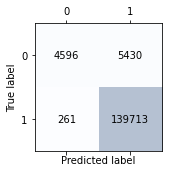

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
model = XGBClassifier(tree_method = 'exact', n_jobs=-1, n_estimators=500)
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")

confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[1, 0])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

#w

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# params = {'max_depth': [5, 10, 15, 20, 25],
#           'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
#           'n_estimators': [500, 1000, 2000, 3000, 5000],
#           'min_child_weight': [0, 2, 5, 10, 20],
#           'max_delta_step': [0, 0.2, 0.6, 1, 2],
#           'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#           'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#           'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#           'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#           'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]}

# 已知最佳參數組合，整段註解以下列程式為主，避免重整時多餘效能與時間之浪費

params = {'max_delta_step': [0.2], 'max_depth': [5], 'min_child_weight': [20]}

gs_xgb = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=2, verbose=2)
gs_xgb.fit(X_train, y_train)

print("最佳參數組合: ", gs_xgb.best_params_)
print("最佳Score  : ", gs_xgb.best_score_)

# 最佳參數組合:  {'max_delta_step': 0.2, 'max_depth': 5, 'min_child_weight': 20}

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] max_delta_step=0.2, max_depth=5, min_child_weight=20 ............
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  max_delta_step=0.2, max_depth=5, min_child_weight=20, total=  17.6s
[CV] max_delta_step=0.2, max_depth=5, min_child_weight=20 ............
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s
[CV]  max_delta_step=0.2, max_depth=5, min_child_weight=20, total=  17.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.0s finished
最佳參數組合:  {'max_delta_step': 0.2, 'max_depth': 5, 'min_child_weight': 20}
最佳Score  :  0.8517187588421957


In [127]:
final_model = gs_xgb.best_estimator_.fit(X,y)
submission = pd.read_csv('sampleEntry.csv', index_col='Id')
submission[submission.columns[0]] = final_model.predict_proba(test)[:,1]
submission.to_csv('submission.csv')